## Observations and Insights 

In [170]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem


from sklearn import datasets


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_cancer_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_cancer_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

In [171]:
# Checking the number of mice.
total_num_of_mice = mouse_cancer_df["Mouse ID"].nunique()
total_num_of_mice

249

In [172]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
sub_mouse_cancer_df = mouse_cancer_df[["Mouse ID", "Timepoint"]]
duplicates = sub_mouse_cancer_df[sub_mouse_cancer_df.duplicated(['Mouse ID', 'Timepoint'])] 
duplicates

Mouse ID  Timepoint
909     g989          0
911     g989          5
913     g989         10
915     g989         15
917     g989         20

In [173]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_cancer_df.loc[mouse_cancer_df['Mouse ID'] == 'g989']

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [174]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_cancer_df.drop([909])
mouse_cancer_df.drop([911])
mouse_cancer_df.drop([913])
mouse_cancer_df.drop([915])
mouse_cancer_df.drop([917])

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1892 rows x 8 columns]

In [175]:
# Checking the number of mice in the clean DataFrame.
total_num_of_mice = mouse_cancer_df["Mouse ID"].nunique()
total_num_of_mice

249

## Summary Statistics

In [231]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor = np.mean(mouse_cancer_df["Tumor Volume (mm3)"])
median_tumor = np.median(mouse_cancer_df["Tumor Volume (mm3)"])
var_tumor = np.var(mouse_cancer_df["Tumor Volume (mm3)"],ddof = 0)
sd_tumor = np.std(mouse_cancer_df["Tumor Volume (mm3)"],ddof = 0)
sample = mouse_cancer_df.sample(30)
sem_tumor = sem(sample["Tumor Volume (mm3)"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
group_by_drug_regimen = mouse_cancer_df[["Drug Regimen","Tumor Volume (mm3)"]]
group_by_mouse_cancer_df = group_by_drug_regimen.groupby(["Drug Regimen"])

group_by_mean_tumor = group_by_mouse_cancer_df["Tumor Volume (mm3)"].mean()
group_by_median_tumor = group_by_mouse_cancer_df["Tumor Volume (mm3)"].median()
group_by_var_tumor = group_by_mouse_cancer_df["Tumor Volume (mm3)"].var()
group_by_std_tumor = group_by_mouse_cancer_df["Tumor Volume (mm3)"].std()
group_by_sem_tumor = group_by_mouse_cancer_df["Tumor Volume (mm3)"].sem()

drug_regimen_stats_df = pd.DataFrame({"Mean": group_by_mean_tumor,
                         "Median": group_by_median_tumor,
                         "Variance": group_by_var_tumor,
                         "Standard Deviation": group_by_std_tumor,
                         "Standard Error Mean": group_by_sem_tumor})

drug_regimen_stats_df

Mean     Median   Variance  Standard Deviation  \
Drug Regimen                                                        
Capomulin     40.675741  41.557809  24.947764            4.994774   
Ceftamin      52.591172  51.776157  39.290177            6.268188   
Infubinol     52.884795  51.820584  43.128684            6.567243   
Ketapril      55.235638  53.698743  68.553577            8.279709   
Naftisol      54.331565  52.509285  66.173479            8.134708   
Placebo       54.033581  52.288934  61.168083            7.821003   
Propriva      52.322552  50.854632  42.351070            6.507770   
Ramicane      40.216745  40.673236  23.486704            4.846308   
Stelasyn      54.233149  52.431737  59.450562            7.710419   
Zoniferol     53.236507  51.818479  48.533355            6.966589   

              Standard Error Mean  
Drug Regimen                       
Capomulin                0.329346  
Ceftamin                 0.469821  
Infubinol                0.492236  
Ketapril                 0.603860  
Naftisol                 0.596466  
Placebo                  0.581331  
Propriva                 0.512884  
Ramicane                 0.320955  
Stelasyn                 0.573111  
Zoniferol                0.516398

In [235]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
group_by_drug_regimen = mouse_cancer_df[["Drug Regimen","Tumor Volume (mm3)"]]
group_by_mouse_cancer_df = group_by_drug_regimen.groupby(["Drug Regimen"])

group_by_mean_tumor = group_by_mouse_cancer_df["Tumor Volume (mm3)"].mean()
group_by_median_tumor = group_by_mouse_cancer_df["Tumor Volume (mm3)"].median()
group_by_var_tumor = group_by_mouse_cancer_df["Tumor Volume (mm3)"].var()
group_by_std_tumor = group_by_mouse_cancer_df["Tumor Volume (mm3)"].std()
group_by_sem_tumor = group_by_mouse_cancer_df["Tumor Volume (mm3)"].sem()
# Using the aggregation method, produce the same summary statistics in a single line
agg_df = mouse_cancer_df.groupby('Drug Regimen')

## Bar and Pie Charts

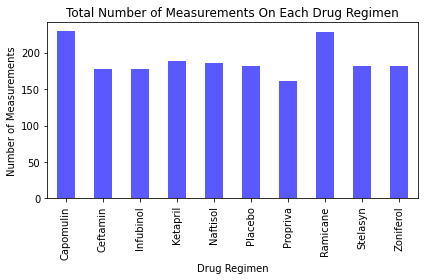

In [178]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_measurements_df = mouse_cancer_df[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"]]
drug_measurements_df = drug_measurements_df.groupby(["Drug Regimen"])
drug_measurement_count = drug_measurements_df["Mouse ID"].count()

drug_measurements = pd.DataFrame({"Meaurement Num": drug_measurement_count})

measurement_bar_graph = drug_measurement_count.plot(kind='bar', title="Total Number of Measurements On Each Drug Regimen",
                                                    color="blue", alpha=0.65)

# Set the xlabel and ylabel using class methods
measurement_bar_graph.set_xlabel("Drug Regimen")
measurement_bar_graph.set_ylabel("Number of Measurements")
plt.tight_layout()

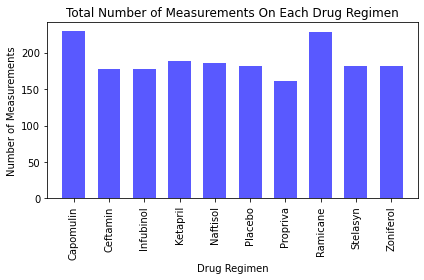

In [179]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measurement_num = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
x_axis = np.arange(len(measurement_num))

plt.bar(x_axis, measurement_num, color='b', width=0.65, alpha=0.65, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", 
                            "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation='vertical')

plt.title("Total Number of Measurements On Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

plt.xlim(-.75, len(x_axis)-0.25)
plt.tight_layout()


([<matplotlib.patches.Wedge at 0x2728c7238e0>,
 [Text(-0.2864345574228052, 1.0620523736210008, 'Male'),
  Text(0.2864345574228046, -1.062052373621001, 'Female')],
 [Text(-0.15623703132153008, 0.579301294702364, '50.6%'),
  Text(0.15623703132152975, -0.5793012947023641, '49.4%')])

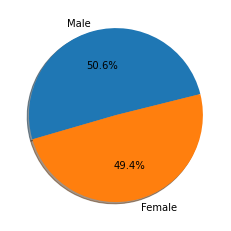

In [180]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_dist = mouse_cancer_df["Sex"].value_counts()
sex_labels = mouse_cancer_df["Sex"].unique()

# The values of each section of the pie chart
plt.pie(sex_dist, labels=sex_labels, autopct="%1.1f%%", shadow=True, startangle=14)

## Quartiles, Outliers and Boxplots

In [181]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_time = mouse_cancer_df[['Timepoint', 'Drug Regimen', 'Mouse ID']].groupby(
                 ['Mouse ID']).max()

max_time = max_time[["Timepoint"]]
max_time = max_time.rename(columns={"Timepoint": "Max Timepoint"})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(mouse_cancer_df, max_time, on="Mouse ID")
merged_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  Max Timepoint  
0              45.000000                 0             45  
1              38.825898                 0             45  
2              35.014271                 1             45  
3              34.223992                 1             45  
4              32.997729                 1             45  
...                  ...               ...            ...  
1888           63.145652                 2             45  
1889           65.841013                 3             45  
1890           69.176246                 4             45  
1891           70.314904                 4             45  
1892           73.867845                 4             45  

[1893 rows x 9 columns]

In [182]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
              'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_df = merged_df.loc[merged_df["Drug Regimen"] == drug]
        
    # add subset
    max_time_tumor_vol = drug_df.loc[drug_df['Timepoint'] == drug_df['Max Timepoint']]
    
    tumor_val = max_time_tumor_vol['Tumor Volume (mm3)']
    tumor_data.append(tumor_val)
    
    # Calculate the IQR & any potential outliers
    quartiles = tumor_val.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(" ")
    
    # Find upper and lower bounds to help identify outliers for each regimen and quantitatively
    # check for outliers
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(" ")

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
 
Values below 17.912664470000003 for Ramicane could be outliers.
Values above 54.30681135 for Ramicane could be outliers.
 
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
 
Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.
 
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
 
Values below 36.83290494999999 for Infubinol could be outliers.
Values above 82.74144559000001 for Infubinol could be outliers.
 
The lower quar

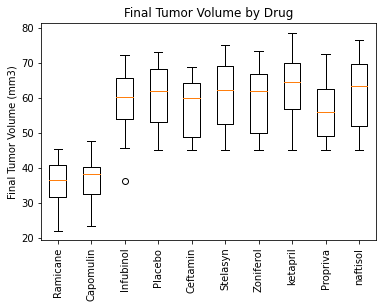

In [183]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_data, manage_ticks=True)

plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4,5,6,7,8,9,10], ["Ramicane", "Capomulin", "Infubinol", "Placebo", "Ceftamin",
                                    "Stelasyn", "Zoniferol", "ketapril", "Propriva", "naftisol"], rotation='vertical')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

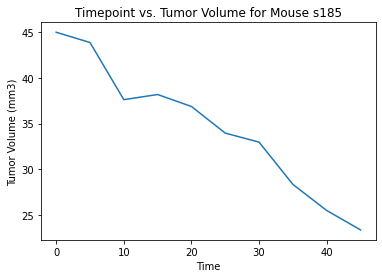

In [184]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_pull = mouse_cancer_df.loc[mouse_cancer_df["Drug Regimen"] == "Capomulin"]

mouse_s185 = mouse_cancer_df.loc[mouse_cancer_df["Mouse ID"] == "s185"] 

plt.plot(mouse_s185["Timepoint"], mouse_s185["Tumor Volume (mm3)"])

# Give our graph axis labels
plt.title("Timepoint vs. Tumor Volume for Mouse s185")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Avg Tumor Volume (mm3)')

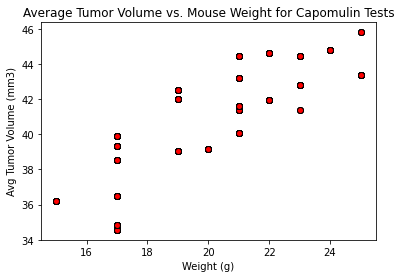

In [185]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_df = mouse_cancer_df[["Mouse ID", "Drug Regimen", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin_scatter_df = scatter_df.loc[scatter_df["Drug Regimen"] == "Capomulin"]

group_tumor_vol = capomulin_scatter_df.groupby('Mouse ID')
avg_tumor_vol = group_tumor_vol["Tumor Volume (mm3)"].mean()

final_scatter = pd.merge(mouse_cancer_df, avg_tumor_vol, on="Mouse ID")

final_scatter.drop_duplicates()
plt.scatter(final_scatter["Weight (g)"], final_scatter["Tumor Volume (mm3)_y"], 
            marker="o", facecolors="red", edgecolors="black")

plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Tests")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")


## Correlation and Regression

The r-value is: 0.8343958614425961
The r-squared is: 0.6962164535925321


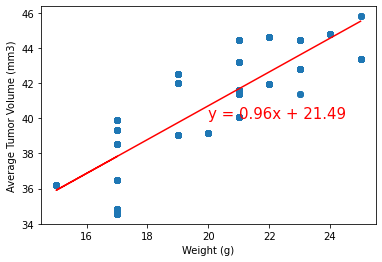

In [230]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = final_scatter['Weight (g)']
y_values = final_scatter['Tumor Volume (mm3)_y']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()